In [1]:
import sys,os,datetime
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [2]:
import  cv2 as cv
cv.__version__

'3.2.0'

In [3]:
# Build new pictures
pathSave = '../Keras/Lines/Picture'
ii       = 0

In [4]:
# Clear Directory. Output: files number
def clearDirectory(pathSave) :
    pathList = os.listdir(pathSave)
    for rmvFile in pathList :
        os.remove(os.path.join(pathSave,rmvFile))
    return(len(pathList))

In [5]:
# Generate Lines on black ground
import random
def buildPLines (n,pathSave,h=201,w=201,c=128,prefix='pl',thick=1) :
    ln,ii = [],0
    for jj in range(n) :
        pp = np.zeros((h,w))
        ii,r1,r2,r3,r4 = ii+1,random.random(),random.random(),random.random(),random.random()
        x1,y1 = int(h*r1),int(w*r2)
        x2,y2 = int(h*r2),int(w*r4)
        pp = cv.line(pp,(x1,y1),(x2,y2),c,thickness=thick)
        pp = cv.GaussianBlur(pp,(3,3),0)
        cv.imwrite(os.path.join(pathSave,prefix+str(10000+ii)+'.png'),pp)
    return(ii)

In [6]:
# Adding Pictures on Grounds 
def buildPG (pathPicture,pathGround,pathPGSave,h=201,w=201) :
    listG = os.listdir(pathGround)
    listP = os.listdir(pathPicture)
    ii    = 0
    for ggg in listG :
        fg = os.path.join(pathGround,ggg)
        pg = cv.imread(fg,-1)
        pg = cv.resize(pg,(h,w))
        if (pg.max()>255) : pg/=255
        pg = pg.astype(np.uint8)
        pg = cv.GaussianBlur(pg,(3,3),0)
        ##print(ggg,pg.dtype,pg.shape)
        for ppp in listP :
            fp = os.path.join(pathPicture,ppp)
            pp = cv.imread(fp,-1)
            pp = cv.resize(pp,(h,w))
            ##print(ppp,pp.dtype,pp.shape)
            ff = cv.add(pg,pp)
            fn = os.path.join(pathPGSave,os.path.splitext(ppp)[0]+'--'+os.path.splitext(ggg)[0]+'.png')
            cv.imwrite(fn,ff); ii += 1;
    return(ii)

In [7]:
pathGround = '../Keras/Lines/Ground'
pathPG     = '../Keras/Lines/PG'
clearDirectory(pathSave)
clearDirectory(pathPG)
buildPLines(200,pathSave,c=20,thick=2)
buildPG(pathSave,pathGround,pathPG)

84400

pl10001--115-10000.png


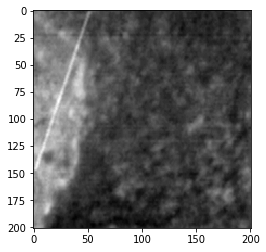

pl10001--115-10004.png


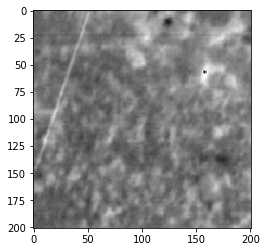

pl10001--115-10005.png


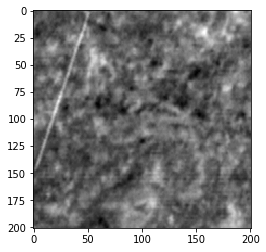

pl10001--115-10007.png


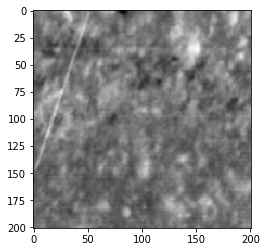

pl10001--115-10010.png


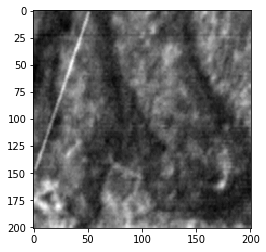

pl10001--115-10012.png


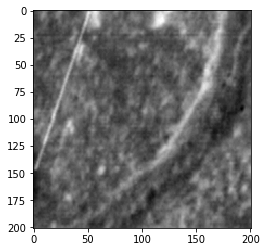

pl10001--115-10014.png


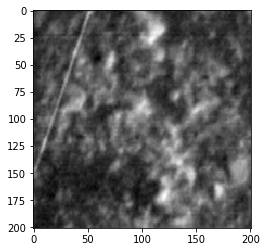

pl10001--115-10016.png


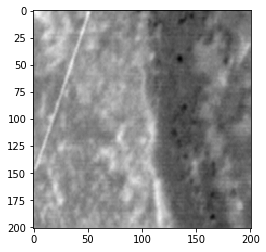

pl10001--115-10017.png


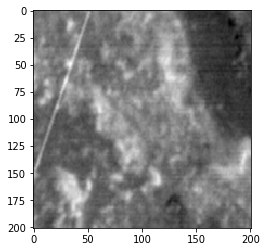

pl10001--115-10022.png


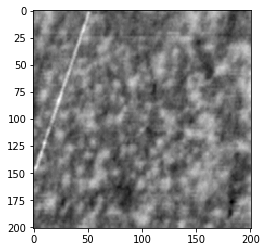

pl10001--115-10023.png


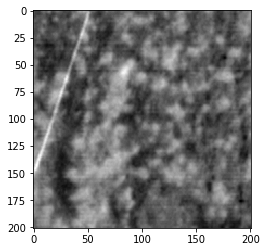

pl10001--115-10024.png


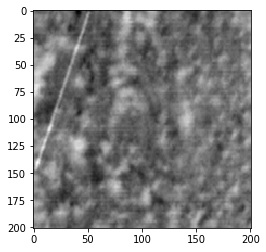

pl10001--115-10025.png


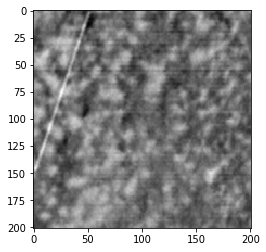

pl10001--115-10027.png


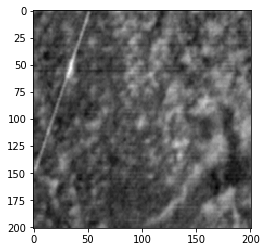

pl10001--115-10029.png


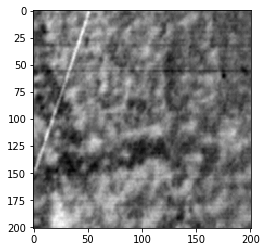

pl10016--115-10004.png


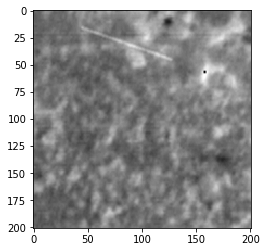

pl10016--115-10005.png


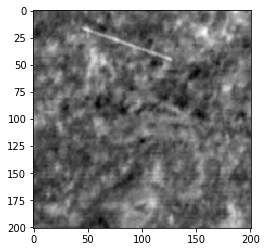

pl10016--115-10007.png


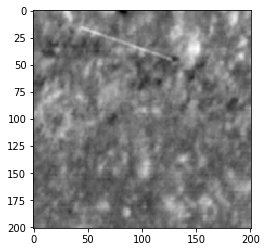

pl10016--115-10010.png


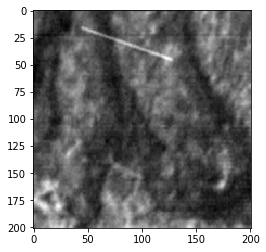

pl10016--115-10012.png


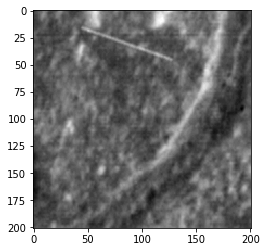

pl10016--115-10014.png


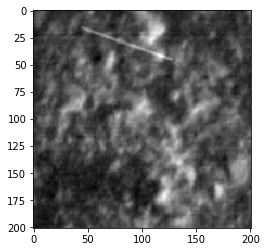

pl10016--115-10016.png


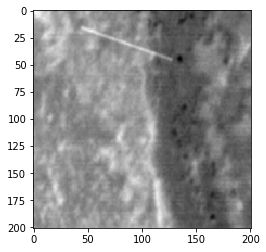

pl10016--115-10017.png


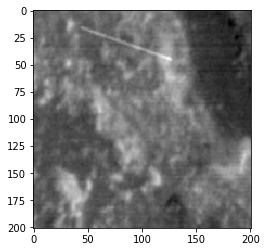

pl10016--115-10022.png


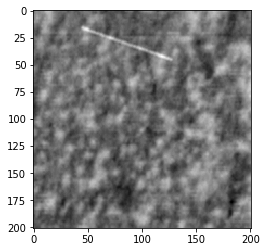

pl10016--115-10023.png


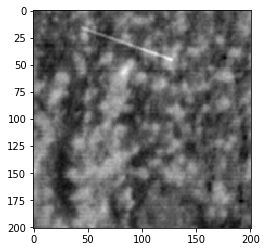

In [8]:
pathLook = pathPG
for rmvFile in os.listdir(pathLook)[0:25] :
    imgName = os.path.join(pathLook,rmvFile)
    try : img0 = cv.imread(imgName,-1); 
    except : continue;

    print(rmvFile)
    plt.imshow(img0,'gray')
    plt.show()
